In [1]:
from numpy import genfromtxt
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.svm as svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
gesture = ['Down', 'Up', 'Left', 'Right']
path = 'HeadData/'
gyro = '/gyro/'
features = 6
trials = 40
x = [[0] * features for i in range(trials*len(gesture))]
y = [0] * trials*len(gesture) 

In [3]:
def min_max_feature_order(s1,s2):
    if (s1>s2): 
        return 1
    else:
        return 5

In [4]:
for i in range(0,len(gesture),1):
    for k in range(0,trials,1):
        path_data = path+ gesture[i]+ gyro +'trial'+str(k+1)+'.csv'
        data = genfromtxt(path_data, delimiter=',')
        #Features
        x[k+i*trials][0]=min_max_feature_order(np.argmax(data[:,1]), np.argmin(data[:,1]))
        x[k+i*trials][1]=min_max_feature_order(np.argmax(data[:,3]), np.argmin(data[:,3]))
        x[k+i*trials][2]=min_max_feature_order(np.argmax(data[:,2]), np.argmin(data[:,2]))
        x[k+i*trials][3]=min(data[:,1]) # down up gestures the x dimension changes the most
        x[k+i*trials][4]=min(data[:,3]) # right left gestures the z dimension changes the most
        x[k+i*trials][5]=min(data[:,2]) 
       # x[k+i*trials][4]=max(data[:,1]) # down up gestures the x dimension changes the most
       # x[k+i*trials][5]=max(data[:,3]) # right left gestures the z dimension changes the most
        # x[k+i*trials][6]=data[:,1].mean() # mean for x dimension
        # x[k+i*trials][7]=data[:,3].mean() # mean for z dimension
        # x[k+i*trials][8]=data[:,1].std() # std for x dimension
        # x[k+i*trials][9]=data[:,3].std() # std for z dimension
        #target variables
        y[[k+i*trials][0]]=i

In [5]:
# Split dataset into training set and test set 
# 75% training and 25% test
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.25, random_state=0) 

In [6]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)        

In [7]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,  average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,  average='micro'))

# Model Confusion Matrix:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[ 8  0  0  0]
 [ 0 11  0  0]
 [ 0  0 11  0]
 [ 0  0  0 10]]


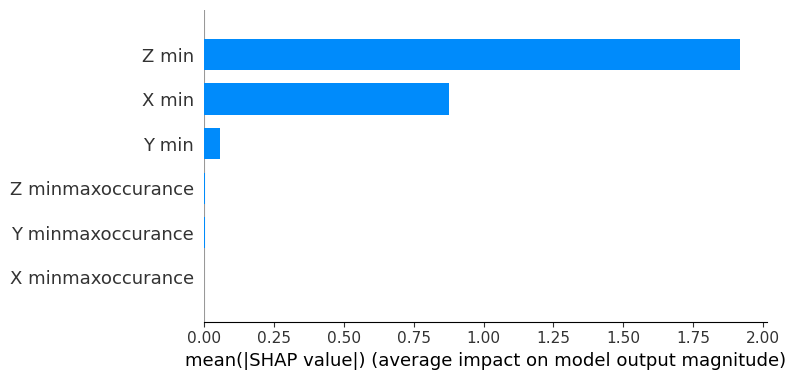

In [9]:
explainer = shap.Explainer(clf, np.array(X_train))
shap_values = explainer.shap_values(np.array(X_test))
# Plot bar plot
feature_names = ['X minmaxoccurance', 'Z minmaxoccurance', 'Y minmaxoccurance', 'X min', 'Z min', 'Y min']
target_names = ['Down', 'Up', 'Left', 'Right']
shap.summary_plot(shap_values[1], X_test, plot_type="bar", feature_names=feature_names, class_names=target_names)


In [ ]:
perfect_acc = 1.0
for my_random_state in range(0,1000000,1):    
    X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.25, random_state=my_random_state) 
    #Create a svm Classifier
    clf = svm.SVC(kernel='linear') # Linear Kernel

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)      

    # Model Accuracy: how often is the classifier correct?
    acc = metrics.accuracy_score(y_test, y_pred)
    if acc < perfect_acc:
        perfect_acc = acc
        if acc != 1.0:
            print("Random state:", my_random_state)
            print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
            print("Precision:",metrics.precision_score(y_test, y_pred,  average='micro'))
            print("Recall:",metrics.recall_score(y_test, y_pred,  average='micro'))
            print("Confusion Matrix:")
            print(confusion_matrix(y_test, y_pred))
            

   

In [ ]:
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.25, random_state=321) 
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)   
confuse = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confuse, display_labels = gesture)
cm_display.plot()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.25, random_state=321) 
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 4)
for i in range (0,4,1):
    print (accuracies[i])

print ('mean k-Fold cross-validation : ' , accuracies.mean())

In [ ]:
# Convert x into numpy array
x = np.array(x)
# Convert y into numpy array
y = np.array(y)
# Normalizee the data along the columns
x = sklearn.preprocessing.normalize(x, axis=0, norm='max')
# Plot the tsne of the data
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(x)
plt.scatter(X_embedded[y == 0,0],X_embedded[y == 0,1], label = 'Down')
plt.scatter(X_embedded[y == 1,0],X_embedded[y == 1,1], label = 'Up')
plt.scatter(X_embedded[y == 2,0],X_embedded[y == 2,1], label = 'Left')
plt.scatter(X_embedded[y == 3,0],X_embedded[y == 3,1], label = 'Right')
# add legends to the plot based on correspondinf y values for each x
# numpy get data only from indexes where y is 0
plt.legend()
plt.show()